In [2]:
# Load libraries
import torch
from sentence_transformers import SentenceTransformer, util

In [3]:
# Define pretrained embedding
embeddings = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

Downloading:   0%|          | 0.00/968 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.79k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/645 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/471M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [4]:
# Define example corpus
corpus = [
    'A man is eating food.',
    'A man is eating a piece of bread.',
    'The girl is carrying a baby.',
    'A man is riding a horse.',
    'A woman is playing violin.',
    'Two men pushed carts through the woods.',
    'A man is riding a white horse on an enclosed ground.',
    'A monkey is playing drums.',
    'A cheetah is running behind its prey.'
    ]

In [5]:
# Apply encoding on example corpus
corpus_embeddings = embeddings.encode(corpus, convert_to_tensor = True)

In [6]:
# Define query sentence
query = "Aku makan nasi"

In [7]:
# Find closest sentence based on k variable on each query using cosine similarities
top_k = min(1, len(corpus))

In [24]:
def find_similar_sentence(query: str) -> str:
    """ 
    Params
        - query: str
    Return
        Similar corpus based on top_k value
    """
    query_embedding = embeddings.encode(query, convert_to_tensor = True)
    cosine_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    top_result = torch.topk(cosine_scores, k = top_k)
    index = int(top_result.indices[0])
    similar_sentence = corpus[index]
    return similar_sentence

In [27]:
# Testing corpus with random query
# NOTE: We were using multilingual embedding which means we could capture more precise meaning in sentence
result = find_similar_sentence(query)
print(f"Similar Sentence of '{query}' is:\n{result}")

Similar Sentence of 'Aku makan nasi' is:
A man is eating food.


Reference:
  - [Semantic Searching with Sentence Transformers](https://www.sbert.net/examples/applications/semantic-search/README.html)

## Approximate Nearest Neighbors

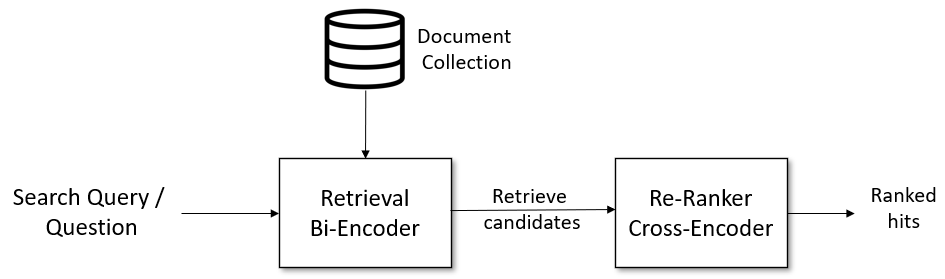